<a href="https://colab.research.google.com/github/srivastavask/cvlab-ai/blob/main/lab2/B25_E22CSEU0743_PRASHANT_CHAUHAN/CV_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

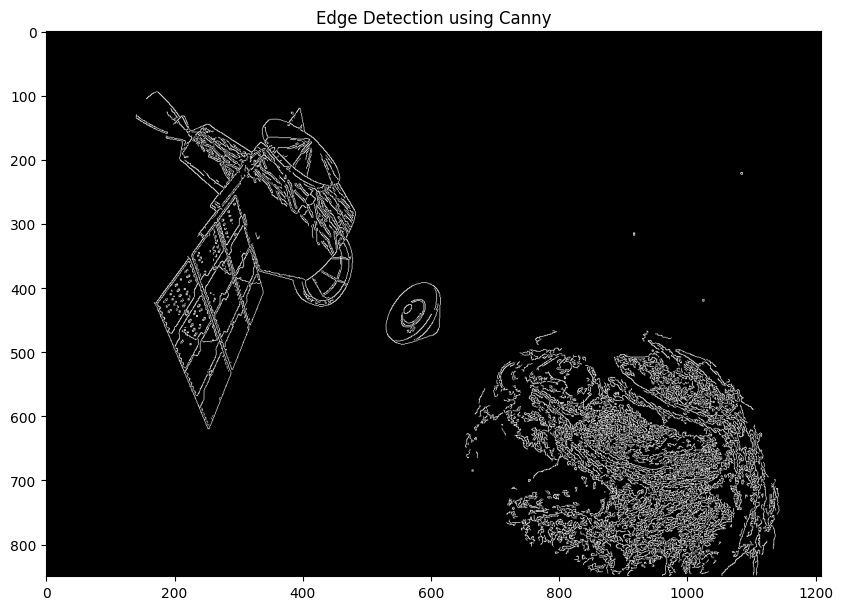

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)

edges = cv2.Canny(image, 100, 200)

plt.figure(figsize=(10, 10))
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection using Canny')
plt.show()


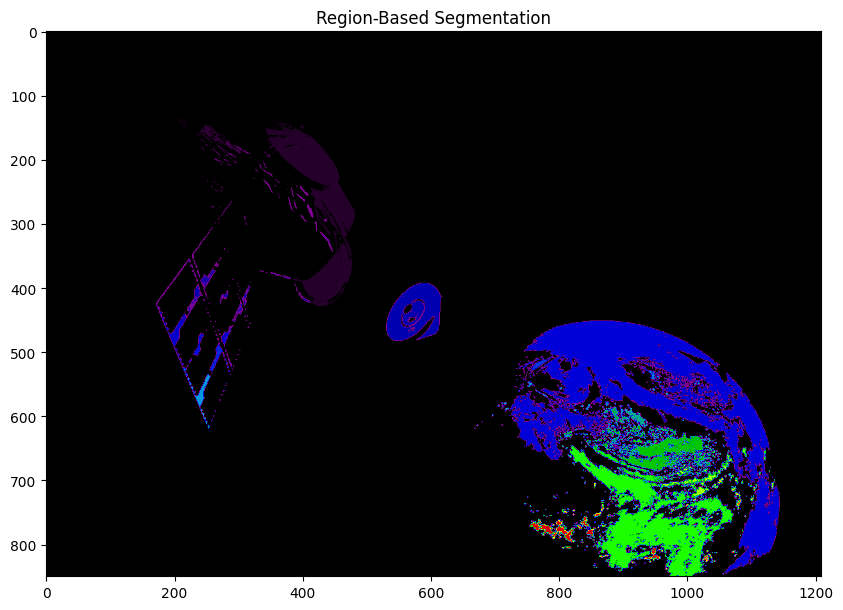

In [2]:
from skimage import measure

image = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)

_, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

labels = measure.label(binary, connectivity=2)

plt.figure(figsize=(10, 10))
plt.imshow(labels, cmap='nipy_spectral')
plt.title('Region-Based Segmentation')
plt.show()


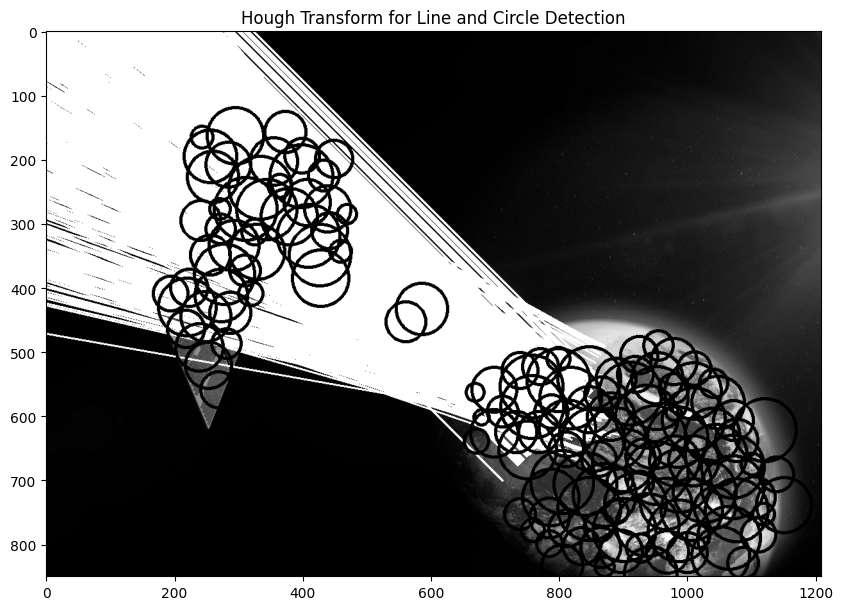

In [3]:
image = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)

edges = cv2.Canny(image, 50, 150, apertureSize=3)

lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=50, param2=30, minRadius=5, maxRadius=50)
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(image, (x, y), r, (0, 255, 0), 4)

plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')
plt.title('Hough Transform for Line and Circle Detection')
plt.show()


Using cache found in C:\Users\rishu/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-3-25 Python-3.9.20 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
C:\Users\rishu/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


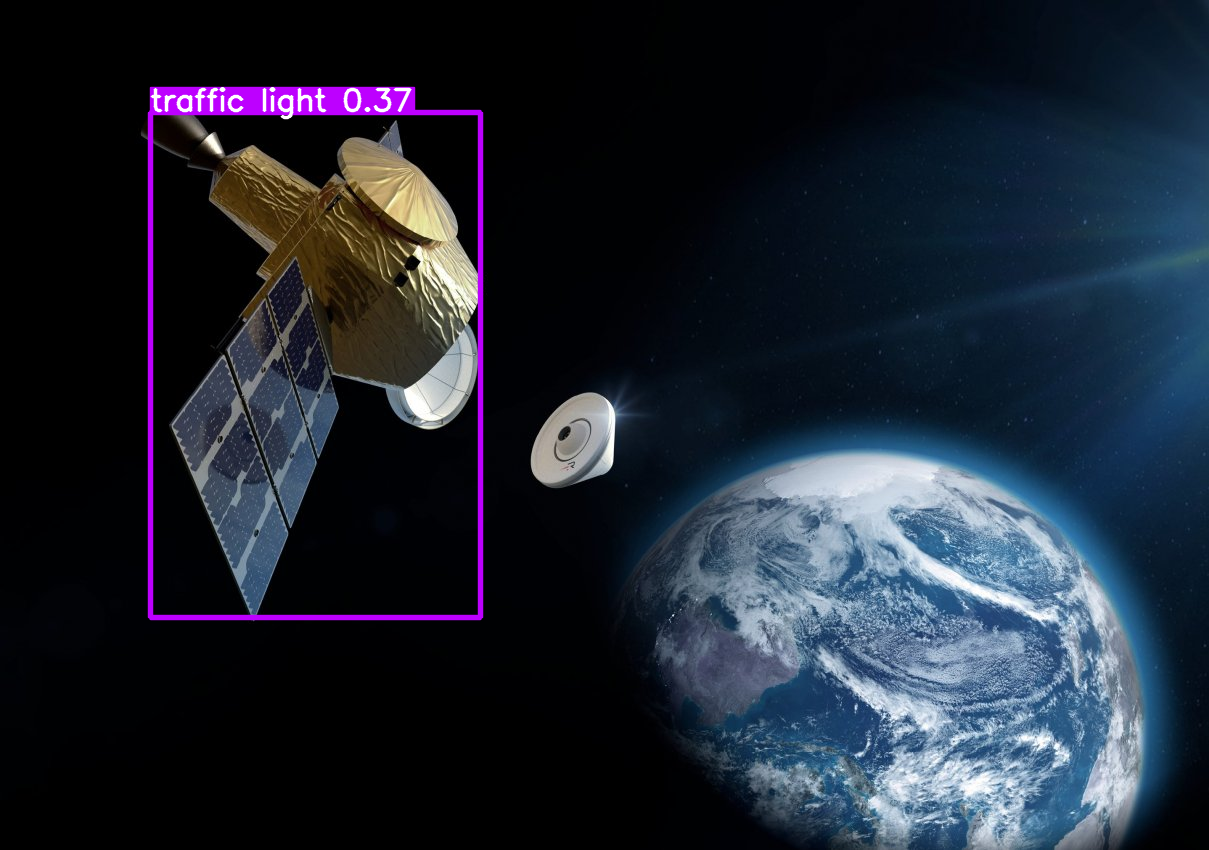

In [4]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
img_path='img.jpg'
bgr_img=cv2.imread(img_path)
rgb_img=cv2.cvtColor(bgr_img,cv2.COLOR_BGR2RGB)
results=model(rgb_img)
results.show()

In [6]:
import torch
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()
transform = transforms.Compose([
        transforms.ToTensor(),
    ])
image_tensor = transform(rgb_img).unsqueeze(0)
with torch.no_grad():
  outputs = model(image_tensor)
boxes = outputs[0]['boxes'].cpu().numpy()
scores = outputs[0]['scores'].cpu().numpy()
for i, box in enumerate(boxes):
  if scores[i] > 0.5:
    cv2.rectangle(bgr_img, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (255, 0, 0), 2)



In [7]:
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()